# Rossmann Store Sales



# Bibliotheken importieren



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

## Daten importieren

In [12]:
import pandas as pd
from pandas.api.types import CategoricalDtype
# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())
# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [14]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')
demand['DayOfWeek'] = demand['DayOfWeek'].replace(to_replace = ['1','2','3','4','5','6','7'], value = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']).astype('category')

display(demand.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
Categories (7, object): ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']

## Visualisieren & Aufbereiten

### Korrelationsdiagramme

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

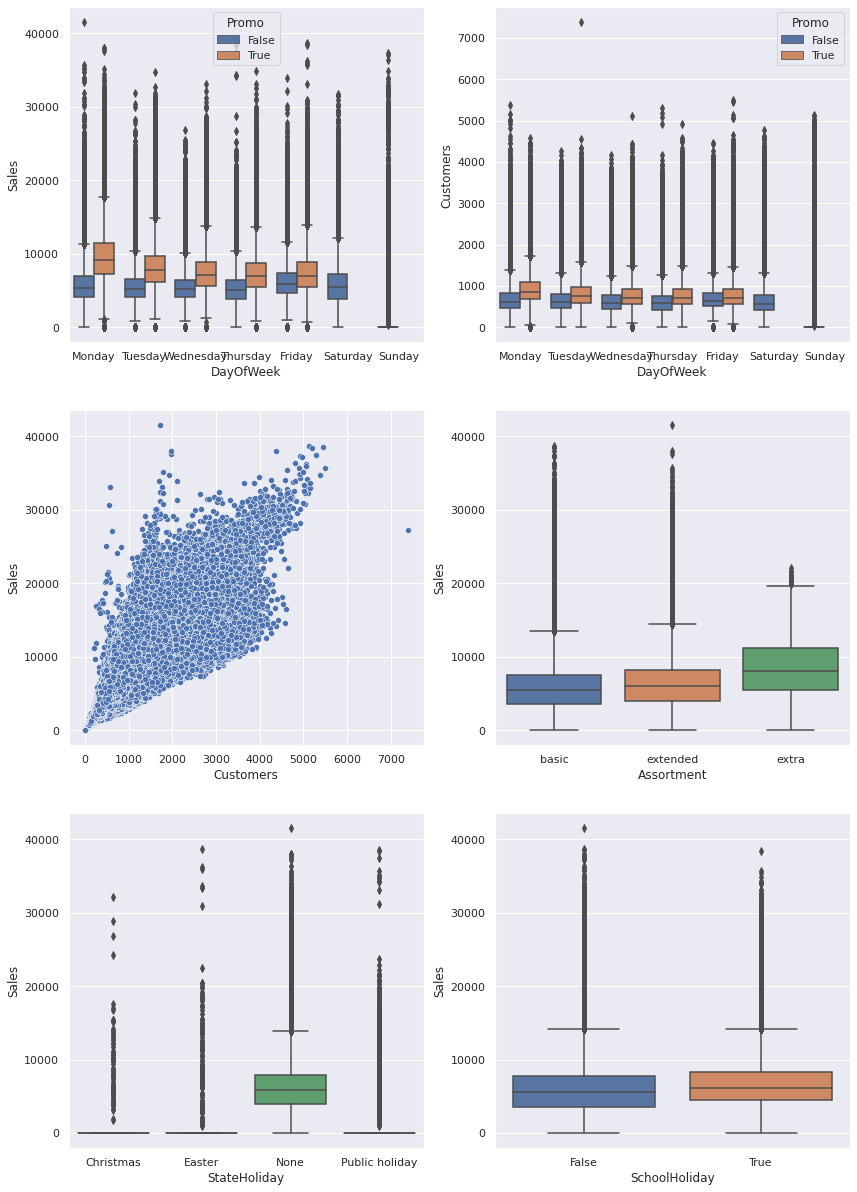

In [19]:
rows, cols = 3, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'DayOfWeek', y = "Sales", hue = 'Promo', data = demand, ax = axs[0], order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.boxplot(x = 'DayOfWeek', y = "Customers", hue = 'Promo', data = demand, ax = axs[1], order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.scatterplot(x = 'Customers', y = "Sales", data = demand, ax = axs[2])
sns.boxplot(x = 'Assortment', y = "Sales", data = demand, ax = axs[3])
sns.boxplot(x = 'StateHoliday', y = "Sales", data = demand, ax = axs[4])
sns.boxplot(x = 'SchoolHoliday', y = "Sales", data = demand, ax = axs[5])

### Transformationen und Anpassungen

### Kodierungen

In [51]:
import datetime as dt

data = demand[demand.Store == 1].copy()

# bool'sche Variablen
for col in ['Open', 'SchoolHoliday', 'Promo']:
    data[col] = data[col].replace(to_replace = [True, False], value = [1,0]).astype('int')

# kategorische Variablen
data = pd.get_dummies(data, columns = ['DayOfWeek', 'StateHoliday'], drop_first = False)

# Trend
data['Trend'] = data.index.map(dt.datetime.toordinal)


# weitere Prediktoren
# Monat
data['Month'] = data.index.month_name()
data = pd.get_dummies(data, columns = ['Month'], drop_first = False)

# Tag im Monat
data['DayOfMonth'] = data.index.day
data = pd.get_dummies(data, columns = ['DayOfMonth'], drop_first = False)

display(data.head())
display(data.info())


,Store,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfMonth_22,DayOfMonth_23,DayOfMonth_24,DayOfMonth_25,DayOfMonth_26,DayOfMonth_27,DayOfMonth_28,DayOfMonth_29,DayOfMonth_30,DayOfMonth_31
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,0
2013-01-02,1,5530,668,1,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,0
2013-01-03,1,4327,578,1,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,0
2013-01-04,1,4486,619,1,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,0
2013-01-05,1,4997,635,1,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Store                        942 non-null    int64   
 1   Sales                        942 non-null    int64   
 2   Customers                    942 non-null    int64   
 3   Open                         942 non-null    int64   
 4   Promo                        942 non-null    int64   
 5   SchoolHoliday                942 non-null    int64   
 6   StoreType                    942 non-null    category
 7   Assortment                   942 non-null    category
 8   CompetitionDistance          942 non-null    object  
 9   CompetitionOpenSinceMonth    942 non-null    object  
 10  CompetitionOpenSinceYear     942 non-null    object  
 11  Promo2                       942 non-null    bool    
 12  Promo2SinceWeek              0 non-null      

None

## Modellieren und Schätzen
### Regressionsmodelle
#### Lineare Regression

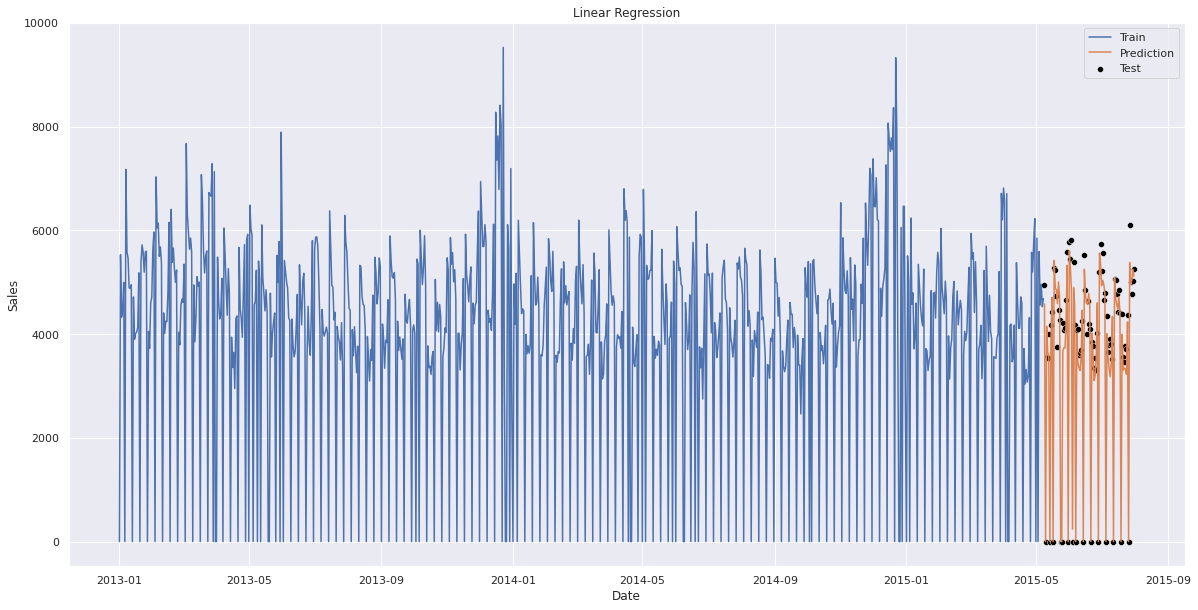

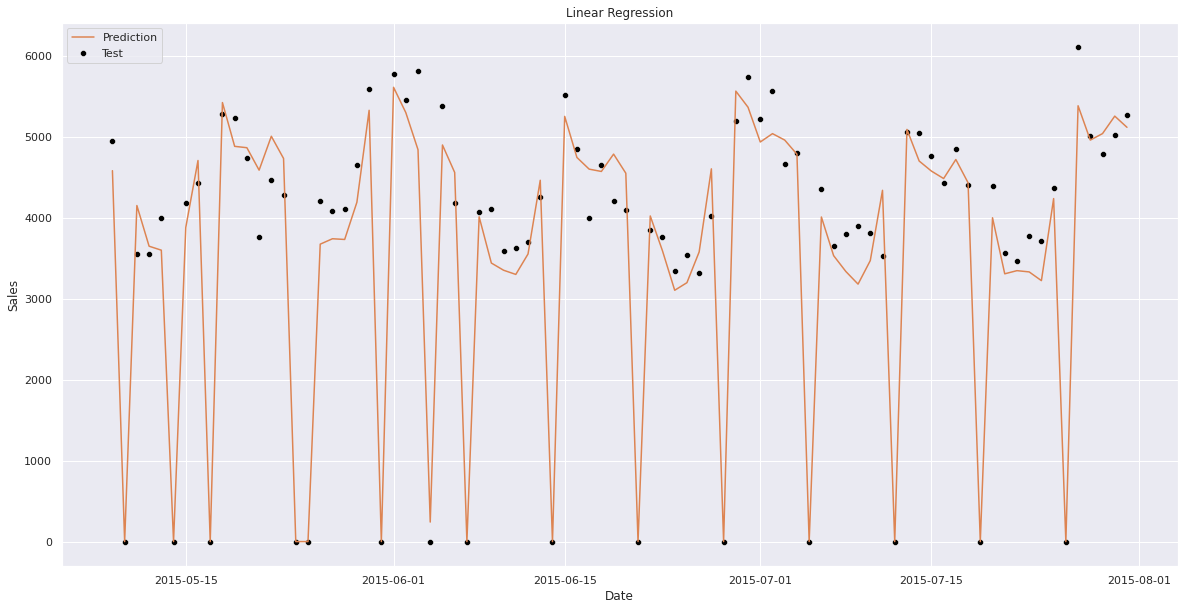

MAE:	 274.23


,Importance
DayOfWeek_Sunday,1.104267e+13
DayOfWeek_Saturday,1.104266e+13
DayOfWeek_Monday,1.104266e+13
DayOfWeek_Friday,1.104266e+13
DayOfWeek_Tuesday,1.104266e+13
DayOfWeek_Wednesday,1.104266e+13
DayOfWeek_Thursday,1.104266e+13
DayOfMonth_24,-7.506449e+11
DayOfMonth_25,-7.506449e+11
DayOfMonth_21,-7.506449e+11


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import TimeSeriesSplit
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

#display(x)
#display(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=3*28, shuffle = False)

forecast = LinearRegression().fit(x_train, y_train)

prediction = pd.DataFrame(data = forecast.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
prediction.columns = ['Sales']

prediction[prediction.Sales < 0] = 0

#display(prediction)

sns.lineplot(data = y_train['Sales'], label = 'Train')
sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = y_test['Sales'], y_pred = prediction['Sales'])))

# summarize feature importance
importance = pd.DataFrame(data = forecast.coef_.transpose(), index = x.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', key=abs, ascending = False))

##### Residualanalyse

,Sales
Date,
2013-12-23,3546.036095
2014-12-22,3520.542605
2014-12-23,2619.837499
2013-05-31,2414.637737
2014-12-20,2266.871612
2014-11-29,2008.792773
2013-03-30,1930.709621
2015-04-04,1817.118674
2013-03-28,1800.325811


,Store,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-25,1,0,0,0,0,1,c,basic,1270,9,...,1,0,0,0,0,0,0,0,0,0
2013-12-26,1,0,0,0,0,1,c,basic,1270,9,...,1,0,0,0,0,0,0,0,0,0
2014-12-25,1,0,0,0,0,1,c,basic,1270,9,...,1,0,0,0,0,0,0,0,0,0
2014-12-26,1,0,0,0,0,1,c,basic,1270,9,...,1,0,0,0,0,0,0,0,0,0


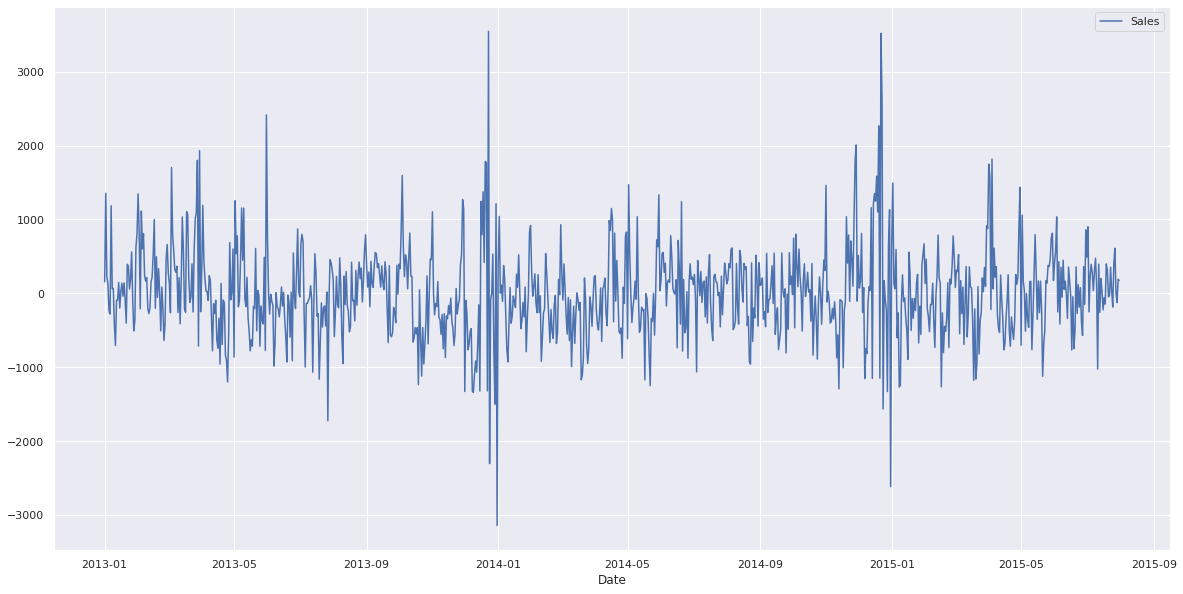

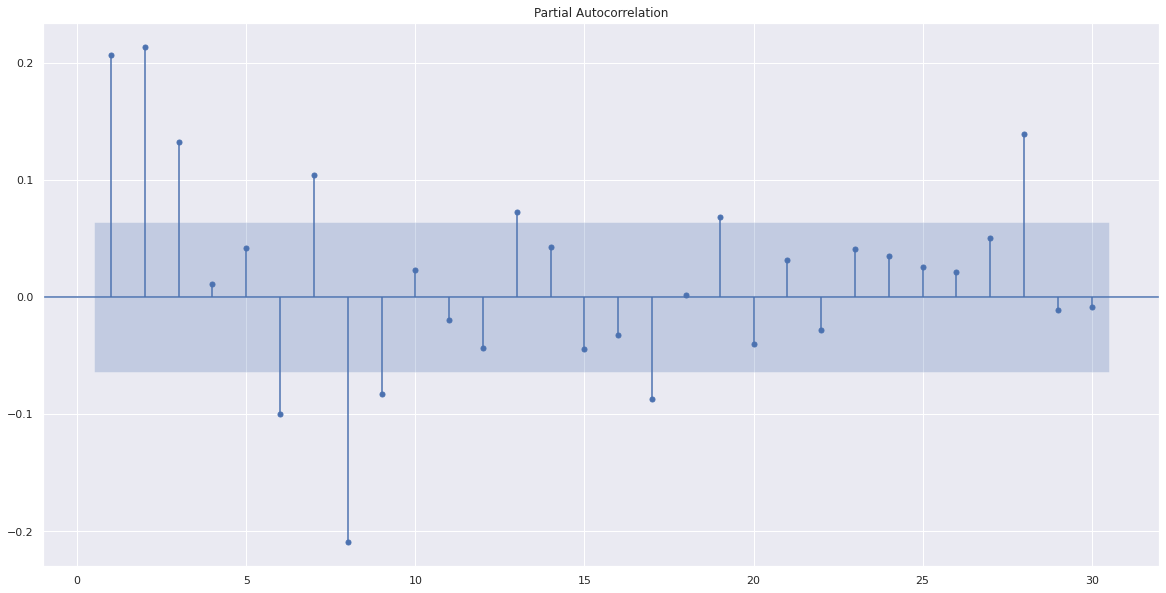

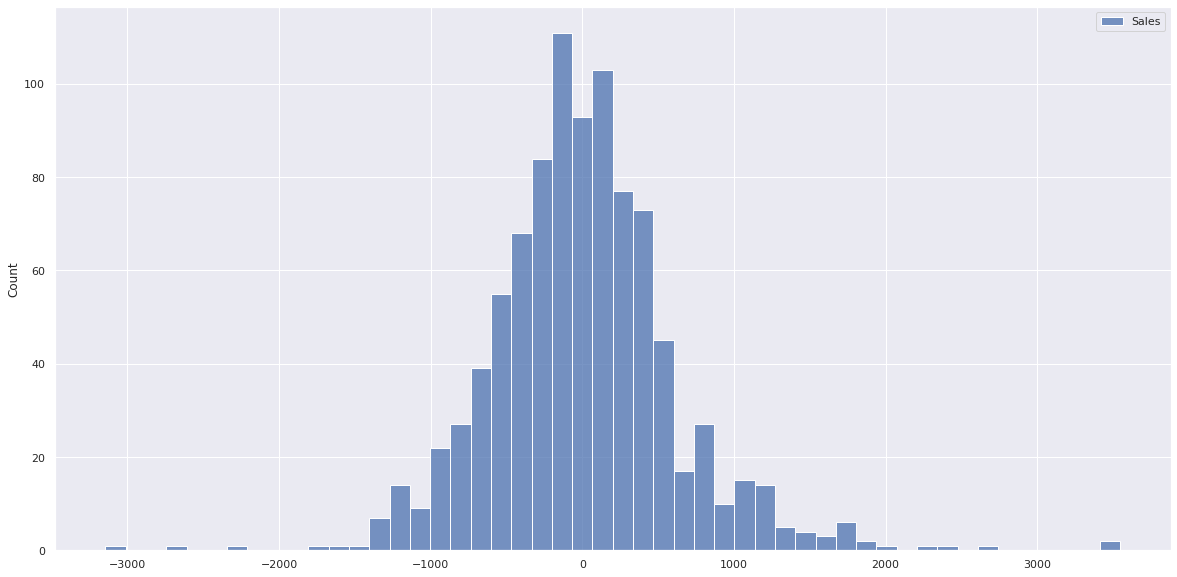

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

forecast = LinearRegression().fit(x, y)

residuals = y - forecast.predict(x)

display(residuals.sort_values(by = 'Sales', ascending = False).head(20))
display(data[data.StateHoliday_Christmas == 1])

sns.lineplot(data = residuals)
plt.show
plot_pacf(residuals.dropna(), zero = False)
plt.show()
sns.histplot(residuals)
plt.show()